# Covid - Pneunmonia Classfication Model from X-ray images

In this project, I will develop a deep learning model that can support doctors with diagnosing lung illnesses.  

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [148]:
training_data_generator = ImageDataGenerator(rescale = 1.0/255,zoom_range =.2,rotation_range =15,width_shift_range = .05,height_shift_range=.05)

In [149]:
DIRECTORY = "/Users/PJMoon/Data_Science_Projects/Covid_Pneumonia_Classification/Covid19-dataset/train/"
DIRECTORY2 = "/Users/PJMoon/Data_Science_Projects/Covid_Pneumonia_Classification/Covid19-dataset/test/"
CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)
BATCH_SIZE = 50

In [150]:
training_iterator = training_data_generator.flow_from_directory(DIRECTORY,class_mode=CLASS_MODE,color_mode=COLOR_MODE,target_size=TARGET_SIZE,batch_size=BATCH_SIZE)

Found 251 images belonging to 3 classes.


In [151]:
validation_data_generator = ImageDataGenerator(rescale=1.0/255)

In [152]:
validation_iterator= validation_data_generator.flow_from_directory(DIRECTORY2,class_mode=CLASS_MODE,color_mode = COLOR_MODE, batch_size=BATCH_SIZE)

Found 66 images belonging to 3 classes.


In [153]:
model = Sequential()

In [154]:
model.add(InputLayer(input_shape=(256,256,1)))

#create a convolutional layer
model.add(Conv2D(16,7,activation = 'relu',strides = 3,padding='same'))
model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
model.add(Conv2D(16,7,activation='relu',strides = 1,padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

In [155]:
785*16

12560

In [156]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 86, 86, 16)        800       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 17, 17, 16)        12560     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 3075      
Total params: 16,435
Trainable params: 16,435
Non-trainable params: 0
_________________________________________________

In [157]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.005)

In [158]:
loss = tf.keras.losses.CategoricalCrossentropy()

In [159]:
es = EarlyStopping(monitor='val_auc', mode='max', verbose=1, patience=20)

In [160]:
model.compile(optimizer = optimizer, loss = loss, metrics =[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()])

In [161]:
history = model.fit(training_iterator,steps_per_epoch=training_iterator.samples/BATCH_SIZE,epochs = 100,validation_data=validation_iterator,validation_steps=validation_iterator.samples/BATCH_SIZE)

Epoch 1/100
5/5 [==============================] - 3s 518ms/step - loss: 1.1530 - categorical_accuracy: 0.2869 - auc_6: 0.5376 - val_loss: 1.0911 - val_categorical_accuracy: 0.3333 - val_auc_6: 0.5785
Epoch 2/100
5/5 [==============================] - 2s 359ms/step - loss: 1.0934 - categorical_accuracy: 0.3665 - auc_6: 0.5755 - val_loss: 1.0855 - val_categorical_accuracy: 0.5758 - val_auc_6: 0.6598
Epoch 3/100
5/5 [==============================] - 2s 535ms/step - loss: 1.0831 - categorical_accuracy: 0.4422 - auc_6: 0.6829 - val_loss: 1.0865 - val_categorical_accuracy: 0.4545 - val_auc_6: 0.6553
Epoch 4/100
5/5 [==============================] - 2s 469ms/step - loss: 1.0733 - categorical_accuracy: 0.5657 - auc_6: 0.6656 - val_loss: 1.0730 - val_categorical_accuracy: 0.3030 - val_auc_6: 0.6248
Epoch 5/100
5/5 [==============================] - 2s 393ms/step - loss: 1.0562 - categorical_accuracy: 0.5259 - auc_6: 0.6442 - val_loss: 1.0113 - val_categorical_accuracy: 0.5455 - val_auc_6: 0.

5/5 [==============================] - 2s 418ms/step - loss: 0.5140 - categorical_accuracy: 0.7928 - auc_6: 0.9340 - val_loss: 0.5913 - val_categorical_accuracy: 0.6061 - val_auc_6: 0.8878
Epoch 42/100
5/5 [==============================] - 2s 392ms/step - loss: 0.4141 - categorical_accuracy: 0.8406 - auc_6: 0.9557 - val_loss: 0.5474 - val_categorical_accuracy: 0.8333 - val_auc_6: 0.9245
Epoch 43/100
5/5 [==============================] - 2s 379ms/step - loss: 0.3341 - categorical_accuracy: 0.8725 - auc_6: 0.9727 - val_loss: 0.6562 - val_categorical_accuracy: 0.7121 - val_auc_6: 0.8809
Epoch 44/100
5/5 [==============================] - 2s 378ms/step - loss: 0.6209 - categorical_accuracy: 0.7809 - auc_6: 0.8976 - val_loss: 0.9265 - val_categorical_accuracy: 0.5000 - val_auc_6: 0.7420
Epoch 45/100
5/5 [==============================] - 2s 480ms/step - loss: 0.6053 - categorical_accuracy: 0.7649 - auc_6: 0.9033 - val_loss: 0.6074 - val_categorical_accuracy: 0.6818 - val_auc_6: 0.8879
Epo

5/5 [==============================] - 2s 384ms/step - loss: 0.4062 - categorical_accuracy: 0.8207 - auc_6: 0.9576 - val_loss: 0.3534 - val_categorical_accuracy: 0.8485 - val_auc_6: 0.9657
Epoch 82/100
5/5 [==============================] - 2s 460ms/step - loss: 0.3111 - categorical_accuracy: 0.8606 - auc_6: 0.9732 - val_loss: 0.4047 - val_categorical_accuracy: 0.8485 - val_auc_6: 0.9567
Epoch 83/100
5/5 [==============================] - 2s 457ms/step - loss: 0.3069 - categorical_accuracy: 0.8884 - auc_6: 0.9746 - val_loss: 0.4182 - val_categorical_accuracy: 0.8333 - val_auc_6: 0.9516
Epoch 84/100
5/5 [==============================] - 2s 391ms/step - loss: 0.3541 - categorical_accuracy: 0.8725 - auc_6: 0.9671 - val_loss: 0.4041 - val_categorical_accuracy: 0.8030 - val_auc_6: 0.9537
Epoch 85/100
5/5 [==============================] - 2s 387ms/step - loss: 0.3016 - categorical_accuracy: 0.8725 - auc_6: 0.9746 - val_loss: 0.3651 - val_categorical_accuracy: 0.8485 - val_auc_6: 0.9650
Epo

KeyError: 'auc'

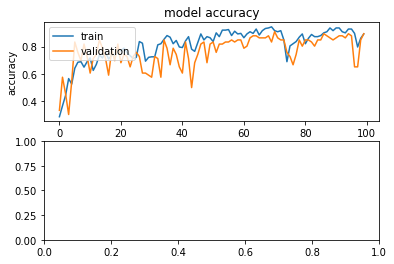

In [163]:

# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()